In [ ]:
# Train

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import library pandas
import pandas as pd

# df_train = pd.read_csv('/content/drive/MyDrive/Repo CHP 9/[Platinum] Chapter 9/Data Latihan Students Chapter 9/Data NusaX/train.csv')
# df_valid = pd.read_csv('/content/drive/MyDrive/Repo CHP 9/[Platinum] Chapter 9/Data Latihan Students Chapter 9/Data NusaX/valid.csv')

# buat header kolom tabel dengan nama text dan label
header = ['text', 'label']

# masukan data train
df = pd.read_csv('train_preprocess.txt', 
                sep='\t',
                lineterminator='\n',
                on_bad_lines='error',
                header=None,
                names=header)

# df = df_train.append(df_valid, ignore_index=True)

In [3]:
# tampilkan 5 data pertama
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [4]:
# Import keras dari library tensorflow
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.callbacks import EarlyStopping

# Memecah kalimat menjadi kata.  
# saring text yang mengandung !"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n
# ubah text menjadi lowercase
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
# setiap kalimat pada df['text'] diubah ke dalam bentuk tokenizer
tokenizer.fit_on_texts(df['text'].values)
# tampung kata unique yang sudah di tokenizer ke dalam variable word_index
word_index = tokenizer.word_index
# tampilkan jumlah kata unique
print('found %s unique tokens.' % len(word_index))

# ubah kata pada data df['text'] menjadi urutan integer
sekuens_x = tokenizer.texts_to_sequences(df['text'].values)
# ubah urutan integer pada sequences_x ke dalam array 2D.
# maxlen=None. maksimum panjang array akan disesuaikan dengan kalimat yang memiliki kumpulan kata terpanjang pada valiable sekuens_x
# kalimat yang tidak memiliki kumpulan kata yang panjang akan di berikan pading
padded_x = pad_sequences(sekuens_x, maxlen=None)
# tampilkan shape data padded_x
print('Shape of data tensor:', padded_x.shape)

found 17272 unique tokens.
Shape of data tensor: (11000, 96)


In [5]:
sekuens_x[0]

[250,
 11,
 2661,
 125,
 3848,
 3456,
 112,
 2,
 30,
 1385,
 169,
 256,
 143,
 112,
 596,
 4,
 22,
 112,
 770,
 1894,
 6393,
 1623,
 1894,
 8842,
 2196,
 250,
 2,
 320,
 21,
 436,
 2485,
 112,
 266,
 21,
 403,
 94,
 55,
 47,
 380,
 362,
 108,
 18,
 25,
 139,
 137,
 2870,
 112,
 8843,
 1,
 5,
 496,
 7,
 2,
 453,
 19,
 8844]

In [6]:
padded_x[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  250,   11, 2661,  125,
       3848, 3456,  112,    2,   30, 1385,  169,  256,  143,  112,  596,
          4,   22,  112,  770, 1894, 6393, 1623, 1894, 8842, 2196,  250,
          2,  320,   21,  436, 2485,  112,  266,   21,  403,   94,   55,
         47,  380,  362,  108,   18,   25,  139,  137, 2870,  112, 8843,
          1,    5,  496,    7,    2,  453,   19, 8844])

In [7]:
# ubah kategori label ke dalam indikator variable. value pada label akan menjadi header dan isinya berubah menjadi 1/0 True/False
y = pd.get_dummies(df.label)
# tampilkan shape dari data y
print('shape of tensor:', y.shape)

shape of tensor: (11000, 3)


In [8]:
from sklearn.model_selection import train_test_split

# Memecah data pada padded_x dan y menjadi data latih dan data uji 
# 20% data di ubah menjadi data uji.
# random_state untuk mengatur data yang diacak
x_train, x_test, y_train, y_test = train_test_split(padded_x, y, test_size=0.2, random_state = 42)
# Memecah data x_train dan y_train menjadi data latih dan data val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

In [9]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_val.shape, y_val.shape)

(7040, 96) (7040, 3)
(2200, 96) (2200, 3)
(1760, 96) (1760, 3)


In [10]:
%%time

# buat model sequential
# tf.keras.layers.Embedding(input_dim=100000, output_dim=128) untuk mengubah index menjadi vektor. jumlah fitur pada data yang akan dimasukkan ke dalam model sebanyak 100000, jumlah dimensi output=128 
# tf.keras.layers.LSTM(32, dropout=0.2) untuk membuat layer LSTM. Jumlah unit yang mengontrol kompleksitas dan kapasitas model sebanyak 32. dropout=0.2 untuk menentukan tingkat dropout yang digunakan untuk mengurangi overfitting dengan secara acak "menjatuhkan" (mengabaikan) sebagian unit selama pelatihan
# tf.keras.layers.Dense(8, activation='relu') untuk membuat lapisan Dense (fully connected layer). 8 adalah argumen units atau jumlah neuron atau unit yang akan digunakan dalam lapisan Dense. argumen activation yang menentukan fungsi aktivasi yang akan digunakan pada output lapisan Dense, relu (Rectified Linear Unit) digunakan sebagai fungsi aktivasi.
# activation='softmax': Ini adalah argumen activation yang menentukan fungsi aktivasi yang akan digunakan pada output lapisan Dense. Dalam kasus ini, softmax digunakan sebagai fungsi aktivasi. Softmax sering digunakan pada lapisan output saat menangani masalah klasifikasi multikelas
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100000, output_dim=128),
    tf.keras.layers.LSTM(32, dropout=0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# membuat class untuk mengatur prilaku saat pelatihan model
class myCallback(tf.keras.callbacks.Callback):
    # Aksi yang dilakukan pada akhir setiap epoch
    def on_epoch_end(self, epoch, logs={}):
        # jika akurasi lebih dari 90 maka model di hentikan
        if(logs.get('val_categorical_accuracy') > 0.9 ):
            self.model.stop_training = True

# panggil kelas myCallback()
callbacks = myCallback()

# gunakan optimizers adam. argumen learning_rate yang menentukan tingkat pembelajaran (learning rate) yang akan digunakan oleh optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# compile model. argumen loss yang menentukan fungsi kerugian yang akan digunakan selama pelatihan.argumen optimizer yang menentukan optimizer yang akan digunakan selama pelatihan. argumen metrics yang menentukan metrik evaluasi yang akan digunakan untuk memantau kinerja model selama pelatihan
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

# data latih x_train, y_train. rgumen batch_size yang menentukan jumlah sampel yang digunakan dalam setiap iterasi pelatihan. argumen epochs yang menentukan jumlah iterasi pelatihan yang akan dilakukan. argumen validation_data yang berisi data validasi yang akan digunakan untuk memantau kinerja model selama pelatihan. rgumen callbacks yang berisi daftar callback yang akan digunakan selama pelatihan. Callbacks dapat digunakan untuk melakukan tindakan khusus pada titik-titik tertentu selama pelatihan, seperti menyimpan model terbaik, menghentikan pelatihan dini, atau menyesuaikan tingkat pembelajara
fit = model.fit(x_train, 
                y_train, 
                batch_size = 8,
                epochs=10, 
                validation_data=(x_val, y_val),     
                callbacks = [callbacks]
)

Epoch 1/10
880/880 [==============================] - 104s 116ms/step - loss: 0.5186 - categorical_accuracy: 0.7949 - val_loss: 0.3487 - val_categorical_accuracy: 0.8778
Epoch 2/10
880/880 [==============================] - 101s 115ms/step - loss: 0.2306 - categorical_accuracy: 0.9172 - val_loss: 0.3193 - val_categorical_accuracy: 0.8756
Epoch 3/10
880/880 [==============================] - 103s 117ms/step - loss: 0.1068 - categorical_accuracy: 0.9616 - val_loss: 0.4095 - val_categorical_accuracy: 0.8727
Epoch 4/10
880/880 [==============================] - 101s 115ms/step - loss: 0.0523 - categorical_accuracy: 0.9776 - val_loss: 0.5076 - val_categorical_accuracy: 0.8693
Epoch 5/10
880/880 [==============================] - 103s 117ms/step - loss: 0.0345 - categorical_accuracy: 0.9864 - val_loss: 0.5930 - val_categorical_accuracy: 0.8642
Epoch 6/10
880/880 [==============================] - 104s 118ms/step - loss: 0.0288 - categorical_accuracy: 0.9915 - val_loss: 0.5889 - val_categoric

In [11]:
# tampilkan ringkasan (summary) dari arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         12800000  
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 12,820,899
Trainable params: 12,820,899
Non-trainable params: 0
_________________________________________________________________


In [12]:
import matplotlib.pyplot as plt

# membuat plot dari metrik evaluasi categorical_accuracy 
plt.plot(fit.history['categorical_accuracy'], label='train')
# membuat plot dari metrik evaluasi val_categorical_accuracy 
plt.plot(fit.history['val_categorical_accuracy'], label='val')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

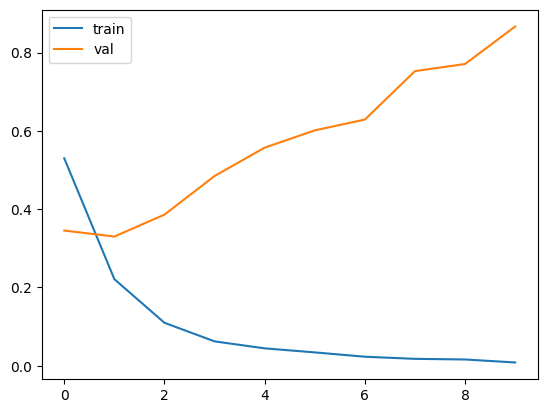

In [13]:
# membuat plot dari metrik evaluasi loss
plt.plot(fit.history['loss'], label='train')
# membuat plot dari metrik evaluasi val_loss
plt.plot(fit.history['val_loss'], label='val')
plt.legend()
plt.show()

In [14]:
# evaluasi kinerja model pada data pelatihan, data validasi, dan data uji
# train_loss dan train_acc berisi nilai loss dan akurasi model pada data pelatihan.
train_loss, train_acc = model.evaluate(x_train, y_train)
# val_loss dan val_acc akan berisi nilai loss dan akurasi model pada data validasi.
val_loss, val_acc = model.evaluate(x_val, y_val)
# test_loss dan test_acc akan berisi nilai loss dan akurasi model pada data uji.
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nTrain: %.3f, val: %.3f, test: %.3f,' % (train_acc, val_acc, test_acc))

69/69 [==============================] - 0s 7ms/step - loss: 0.8895 - categorical_accuracy: 0.8459

Train: 0.998, val: 0.851, test: 0.846,


In [15]:
filename = 'lstm.h5'
# simpan model
model.save(filename)

In [16]:
import io
import json

tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))